# Implementing Copula Trading Strategy, 1
## Proposed by Liew and Wu
Pairs trading: A copula approach

In [1]:
import os
os.getcwd()
os.chdir('D:\\Apprenticeship\\arbitragelab')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arbitragelab.copula_approach.copula_strategy as copula_strategy
import arbitragelab.copula_approach.copula_calculation as ccalc

In [3]:
plt.style.use('ggplot')

pair_prices = pd.read_csv(r'arbitragelab\BKD_ESC_2009_2011.csv')
CS = copula_strategy.CopulaStrategy()
CS_gumbel = copula_strategy.CopulaStrategy()
CS_frank = copula_strategy.CopulaStrategy()
CS_clayton = copula_strategy.CopulaStrategy()
CS_gauss = copula_strategy.CopulaStrategy()
CS_t = copula_strategy.CopulaStrategy()

In [4]:
BKD_series = pair_prices['BKD'].to_numpy()
ESC_series = pair_prices['ESC'].to_numpy()
dates = pair_prices['Date'].to_numpy()

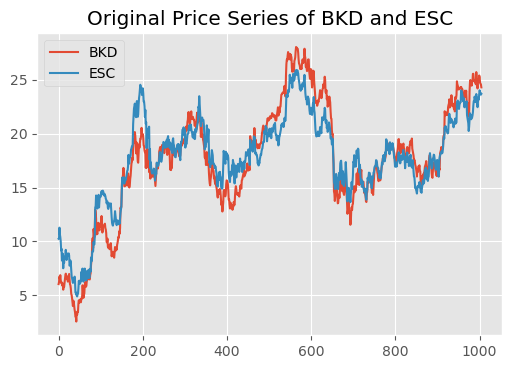

In [5]:
# Plotting scaled prices and original prices
plt.figure(dpi=100)
plt.plot(BKD_series, label='BKD')
plt.plot(ESC_series, label='ESC')
plt.legend()
plt.title(r'Original Price Series of BKD and ESC')
plt.show()

In [6]:
# Training and testing split
training_length = 670

BKD_clr = CS.cum_log_return(BKD_series)
ESC_clr = CS.cum_log_return(ESC_series)

BKD_train = BKD_clr[ : training_length]
ESC_train = ESC_clr[ : training_length]

BKD_test = BKD_clr[training_length : ]
ESC_test = ESC_clr[training_length : ]

# Empirical CDF for the training set
cdf1 = ccalc.find_marginal_cdf(BKD_clr)
cdf2 = ccalc.find_marginal_cdf(ESC_clr)

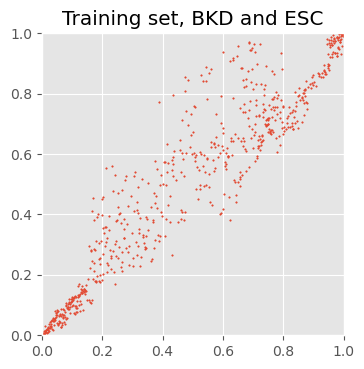

In [7]:
# Training set, density plot
plt.figure(dpi=100)
plt.scatter(cdf1(BKD_train), cdf2(ESC_train), s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'Training set, BKD and ESC')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [8]:
# Fit different copulas
fit_result_gumbel, copula_gumbel, cdf1_gumbel, cdf2_gumbel =\
    CS_gumbel.fit_copula(s1_series=BKD_train, s2_series=ESC_train, copula_name='Gumbel')
fit_result_frank, copula_frank, cdf1_frank, cdf2_frank =\
    CS_frank.fit_copula(s1_series=BKD_train, s2_series=ESC_train, copula_name='Frank')
fit_result_clayton, copula_clayton, cdf1_clayton, cdf2_clayton =\
    CS_clayton.fit_copula(s1_series=BKD_train, s2_series=ESC_train, copula_name='Clayton')
fit_result_gauss, copula_gauss, cdf1_gauss, cdf2_gauss =\
    CS_gauss.fit_copula(s1_series=BKD_train, s2_series=ESC_train, copula_name='Gaussian')
fit_result_t, copula_t, cdf1_t, cdf2_t =\
    CS_t.fit_copula(s1_series=BKD_train, s2_series=ESC_train, copula_name='Student', nu=5)

In [9]:
print(fit_result_gumbel)
print(fit_result_frank)
print(fit_result_clayton)
print(fit_result_gauss)
print(fit_result_t)

{'Copula Name': 'Gumbel', 'SIC': array([-1227.10960618]), 'AIC': array([-1231.61089587]), 'HQIC': array([-1229.8710415])}
{'Copula Name': 'Frank', 'SIC': array([-1378.59698644]), 'AIC': array([-1383.09827613]), 'HQIC': array([-1381.35842175])}
{'Copula Name': 'Clayton', 'SIC': array([-1489.58760537]), 'AIC': array([-1494.08889506]), 'HQIC': array([-1492.34904069])}
{'Copula Name': 'Gaussian', 'SIC': array([-262.66154088]), 'AIC': array([-267.16283057]), 'HQIC': array([-265.42297619])}
{'Copula Name': 'Student', 'SIC': array([-1513.95200874]), 'AIC': array([-1518.45329843]), 'HQIC': array([-1516.71344406])}


In [10]:
# Test copula
position_series = CS_t.analyze_price_series(BKD_test, ESC_test, cdf1, cdf2,
                                            upper_threshold=0.95,
                                            lower_threshold=0.05,
                                            start_position=0)  # Author used 0.95 and 0.05

In [11]:
# Running information tests for the test data with the fitted copula
test_ic_data = CS_t.ic_test(BKD_test, ESC_test, cdf1, cdf2)
print(test_ic_data)

{'Copula Name': 'Student', 'SIC': array([-676.96059069]), 'AIC': array([-680.76270921]), 'HQIC': array([-679.25413872])}


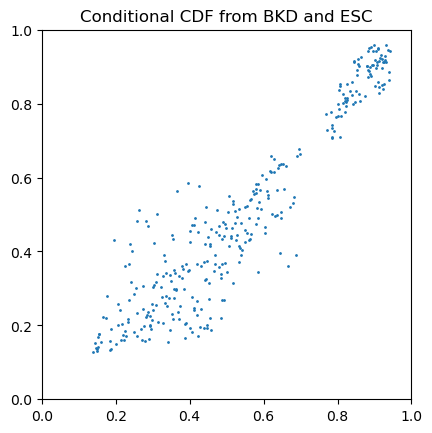

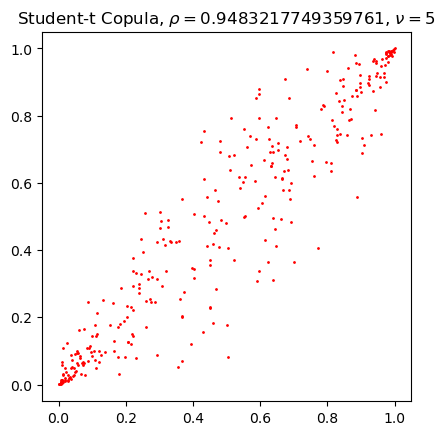

In [12]:
# Plot conditional probability
plt.style.use('default')
plt.figure(dpi=100)
plt.scatter(cdf1(BKD_test), cdf2(ESC_test), s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r'Conditional CDF from BKD and ESC')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Plot fitted copula
fig, ax = plt.subplots(dpi=100)
CS.graph_copula(copula_name='Student', cov=copula_t.cov, nu=copula_t.nu, ax=ax, color='r', s=1, num=330)
plt.show()

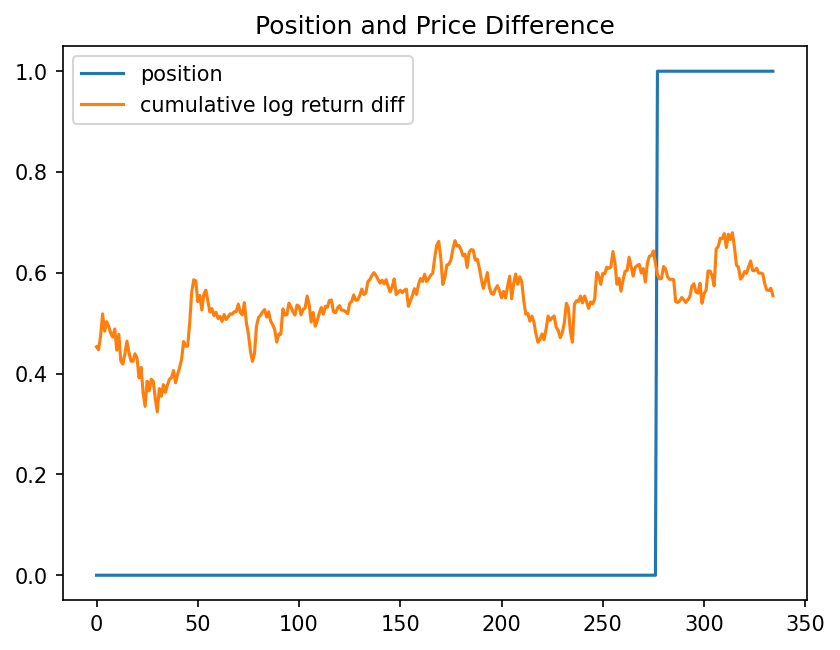

In [13]:
# Plot positions with pairs spread
diff = (BKD_test - ESC_test)*1
plt.figure(dpi=150)
plt.plot(position_series, label='position')
plt.plot(diff , label='cumulative log return diff')
plt.legend()
plt.title(r'Position and Price Difference')
plt.show()